In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
dataset = pd.read_csv("C:\Users\k.rahul\OneDrive\Desktop\RAHUL")
dataset.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1414514800.py, line 1)

In [ ]:
dataset = dataset.drop('id', axis=1)

In [ ]:
dataset.shape

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.describe()

In [ ]:
dataset.dtypes

In [ ]:
dataset.head()

### Replacing Categorical values with numbers:

#### 1. rbc

In [ ]:
dataset['rbc'].value_counts()

In [ ]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

#### 2. pc

In [ ]:
dataset['pc'].value_counts()

In [ ]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

#### 3. pcc

In [ ]:
dataset['pcc'].value_counts()

In [ ]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

#### 4. ba

In [ ]:
dataset['ba'].value_counts()

In [ ]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})

#### 5. htn

In [ ]:
dataset['htn'].value_counts()

In [ ]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 6. dm

In [ ]:
dataset['dm'].value_counts()

In [ ]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [ ]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 7. cad

In [ ]:
dataset['cad'].value_counts()

In [ ]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})

In [ ]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 8. appet

In [ ]:
dataset['appet'].unique()

In [ ]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

#### 9. pe

In [ ]:
dataset['pe'].value_counts()

In [ ]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 10. ane

In [ ]:
dataset['ane'].value_counts()

In [ ]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 11. classification

In [ ]:
dataset['classification'].value_counts()

In [ ]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [ ]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [ ]:
dataset.head()

In [11]:
# Datatypes:
dataset.dtypes

NameError: name 'dataset' is not defined

### Converting Object values into Numeric values:

In [ ]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [ ]:
# Datatypes:
dataset.dtypes

In [ ]:
# Description:
dataset.describe()

In [ ]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

### Handling Null Values:

- There is Outliers present in our dataset so We fill NaN values with Median.

In [ ]:
dataset.columns

In [ ]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [ ]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [ ]:
dataset.isnull().any().sum()

### Heatmap

In [ ]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

- We clearly see that 'pcv' and 'hemo' feature has **85% multicollinearity** 
- So we remove one of the feature. i.e **pcv**

In [26]:
dataset.drop('pcv', axis=1, inplace=True)

NameError: name 'dataset' is not defined

In [28]:
dataset.head()

NameError: name 'dataset' is not defined

In [30]:
# Target feature:
sns.countplot(dataset['classification'])

NameError: name 'dataset' is not defined

In [132]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [32]:
X.head()

NameError: name 'X' is not defined

In [ ]:
# Train Test Split:
from sklearn.model_selection import train_test_split
Xb_train,Xb_test,yb_train,yb_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logb = LogisticRegression()
logb.fit(Xb_train,yb_train)

y_pred1b = logb.predict(Xb_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(yb_test,y_pred1b))
print(metrics.classification_report(yb_test, y_pred1b))

0.9083333333333333
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        58
           1       0.90      0.92      0.91        62

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
from sklearn import svm

svmb = svm.SVC()

svmb.fit(Xb_train,yb_train)

y_pred2b = svmb.predict(Xb_test)
print(accuracy_score(yb_test,y_pred2b))
print(metrics.classification_report(yb_test, y_pred2b))

0.5166666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.52      1.00      0.68        62

    accuracy                           0.52       120
   macro avg       0.26      0.50      0.34       120
weighted avg       0.27      0.52      0.35       120



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [148]:
from sklearn.neighbors import KNeighborsClassifier

knnb = KNeighborsClassifier()

knnb.fit(Xb_train,yb_train)

y_pred3b=knnb.predict(Xb_test)
print(accuracy_score(yb_test,y_pred3b))
print(metrics.classification_report(yb_test, y_pred3b))

0.7083333333333334
              precision    recall  f1-score   support

           0       0.65      0.84      0.74        58
           1       0.80      0.58      0.67        62

    accuracy                           0.71       120
   macro avg       0.73      0.71      0.70       120
weighted avg       0.73      0.71      0.70       120



In [149]:
from sklearn.tree import DecisionTreeClassifier

dtb = DecisionTreeClassifier()

dtb.fit(Xb_train,yb_train)

y_pred4b= dtb.predict(Xb_test)
print(accuracy_score(yb_test,y_pred4b))
print(metrics.classification_report(yb_test, y_pred4b))

0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.95      0.97      0.96        62

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [150]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
forestb=RandomForestClassifier()

#Train the model using the training sets
train1b=forestb.fit(Xb_train,yb_train)
y_pred7b=train1b.predict(Xb_test)
print("Accuracy:",accuracy_score(yb_test, y_pred7b))
print(metrics.classification_report(yb_test, y_pred7b))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [151]:
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score

In [153]:
final_datab = pd.DataFrame({'Models':['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','KNEAREST NEIGHBOURS','DECISION TREE','RANDOM FOREST'],
                          'ACCURACY':[ accuracy_score(yb_test,y_pred1b)*100,
                                accuracy_score(yb_test,y_pred2b)*100,
                                accuracy_score(yb_test,y_pred3b)*100,
                                accuracy_score(yb_test,y_pred4b)*100,
                                accuracy_score(yb_test,y_pred7b)*100],
                           "RECALL":[recall_score(yb_test, y_pred1b)*100,
                                    recall_score(yb_test, y_pred2b)*100,
                                    recall_score(yb_test, y_pred3b)*100,
                                    recall_score(yb_test, y_pred4b)*100,
                                    recall_score(yb_test, y_pred7b)*100],
                           "PRECISION":[precision_score(yb_test, y_pred1b)*100,
                                       precision_score(yb_test, y_pred2b)*100,
                                       precision_score(yb_test, y_pred3b)*100,
                                       precision_score(yb_test, y_pred4b)*100,
                                       precision_score(yb_test, y_pred7b)*100],
                           "F-MEASURE":[f1_score(yb_test, y_pred1b)*100,
                                       f1_score(yb_test, y_pred2b)*100,
                                       f1_score(yb_test, y_pred3b)*100,
                                       f1_score(yb_test, y_pred4b)*100,
                                       f1_score(yb_test, y_pred7b)*100],
                           "AUC":[roc_auc_score(yb_test, y_pred1b)*100,
                                 roc_auc_score(yb_test, y_pred2b)*100,
                                 roc_auc_score(yb_test, y_pred3b)*100,
                                 roc_auc_score(yb_test, y_pred4b)*100,
                                 roc_auc_score(yb_test, y_pred7b)*100]
                          })

In [175]:
final_databac = pd.DataFrame({'Models':['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','KNEAREST NEIGHBOURS','DECISION TREE','RANDOM FOREST'],
                          'ACCURACY':[ accuracy_score(yb_test,y_pred1b)*100,
                                accuracy_score(yb_test,y_pred2b)*100,
                                accuracy_score(yb_test,y_pred3b)*100,
                                accuracy_score(yb_test,y_pred4b)*100,
                                accuracy_score(yb_test,y_pred7b)*100]})

In [154]:
final_datab

,Models,ACCURACY,RECALL,PRECISION,F-MEASURE,AUC
0,LOGISTIC REGRESSION,90.833333,91.935484,90.476190,91.200000,90.795328
1,SUPPORT VECTOR CLASSIFIER,51.666667,100.000000,51.666667,68.131868,50.000000
2,KNEAREST NEIGHBOURS,70.833333,58.064516,80.000000,67.289720,71.273637
3,DECISION TREE,95.833333,96.774194,95.238095,96.000000,95.800890
4,RANDOM FOREST,97.500000,100.000000,95.384615,97.637795,97.413793


<AxesSubplot:title={'center':'Grouped Bar Graph of metrics'}, xlabel='Models'>

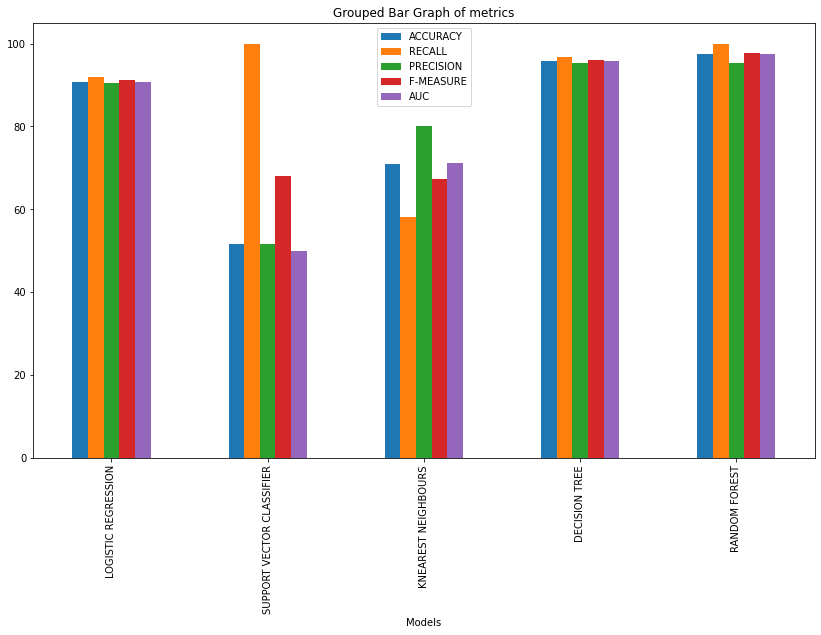

In [180]:
dfb =final_datab  
dfb.plot(x='Models',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph of metrics',
       figsize=(14,8))


<AxesSubplot:title={'center':'Grouped Bar Graph of accuracy'}, xlabel='Models'>

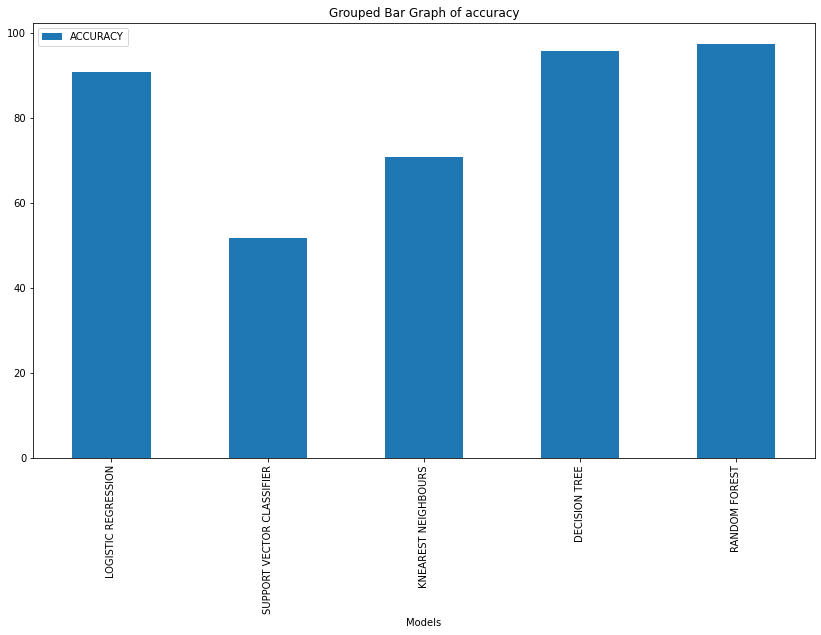

In [179]:
dfb2 =final_databac  
dfb2.plot(x='Models',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph of accuracy',
       figsize=(14,8))


# AFTER FEATURE SELECTION,BOOSTING

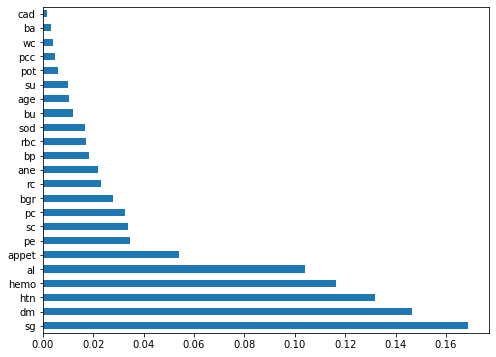

In [156]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [157]:
ranked_features.nlargest(8).index

Index(['sg', 'dm', 'htn', 'hemo', 'al', 'appet', 'pe', 'sc'], dtype='object')

In [158]:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [159]:
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [160]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [161]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [162]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

In [163]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [164]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [165]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log = LogisticRegression()
log.fit(X_train,y_train)

y_pred1 = log.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred1)

print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.93      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



In [167]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train,y_train)

y_pred2 = svm.predict(X_test)

accuracy_score(y_test,y_pred2)
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.89      0.92      0.90        62

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)
print(metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.95      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [169]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred4= dt.predict(X_test)

accuracy_score(y_test,y_pred4)
print(metrics.classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [170]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
forest=RandomForestClassifier()

#Train the model using the training sets
train1=forest.fit(X_train,y_train)
y_pred7=train1.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred7))
print(metrics.classification_report(y_test, y_pred7))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [171]:
from sklearn.metrics import recall_score,precision_score,f1_score,roc_auc_score

In [172]:
final_data = pd.DataFrame({'Models':['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','KNEAREST NEIGHBOURS','DECISION TREE','RANDOM FOREST'],
                          'ACCURACY':[ accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred7)*100],
                           "RECALL":[recall_score(y_test, y_pred1)*100,
                                    recall_score(y_test, y_pred2)*100,
                                    recall_score(y_test, y_pred3)*100,
                                    recall_score(y_test, y_pred4)*100,
                                    recall_score(y_test, y_pred7)*100],
                           "PRECISION":[precision_score(y_test, y_pred1)*100,
                                       precision_score(y_test, y_pred2)*100,
                                       precision_score(y_test, y_pred3)*100,
                                       precision_score(y_test, y_pred4)*100,
                                       precision_score(y_test, y_pred7)*100],
                           "F-MEASURE":[f1_score(y_test, y_pred1)*100,
                                       f1_score(y_test, y_pred2)*100,
                                       f1_score(y_test, y_pred3)*100,
                                       f1_score(y_test, y_pred4)*100,
                                       f1_score(y_test, y_pred7)*100],
                           "AUC":[roc_auc_score(y_test, y_pred1)*100,
                                 roc_auc_score(y_test, y_pred2)*100,
                                 roc_auc_score(y_test, y_pred3)*100,
                                 roc_auc_score(y_test, y_pred4)*100,
                                 roc_auc_score(y_test, y_pred7)*100]
                          })

In [177]:
final_dataac = pd.DataFrame({'Models':['LOGISTIC REGRESSION','SUPPORT VECTOR CLASSIFIER','KNEAREST NEIGHBOURS','DECISION TREE','RANDOM FOREST'],
                          'ACCURACY':[ accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred7)*100]})

In [173]:
final_data

,Models,ACCURACY,RECALL,PRECISION,F-MEASURE,AUC
0,LOGISTIC REGRESSION,92.500000,91.935484,93.442623,92.682927,92.519466
1,SUPPORT VECTOR CLASSIFIER,90.000000,91.935484,89.062500,90.476190,89.933259
2,KNEAREST NEIGHBOURS,93.333333,91.935484,95.000000,93.442623,93.381535
3,DECISION TREE,99.166667,98.387097,100.000000,99.186992,99.193548
4,RANDOM FOREST,97.500000,100.000000,95.384615,97.637795,97.413793


<AxesSubplot:title={'center':'Grouped Bar Graph of metrics'}, xlabel='Models'>

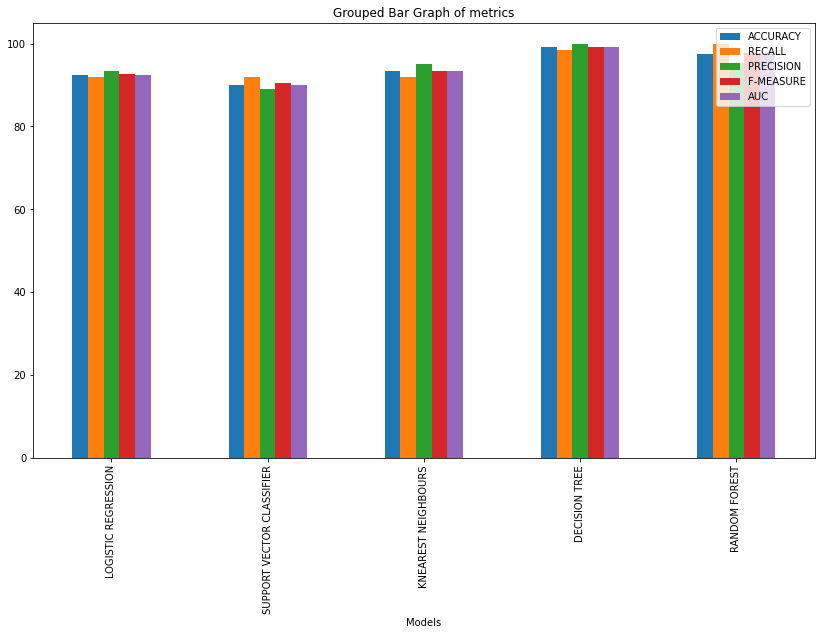

In [181]:
df =final_data  
df.plot(x='Models',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph of metrics',
       figsize=(14,8))


<AxesSubplot:title={'center':'Grouped Bar Graph of accuracy'}, xlabel='Models'>

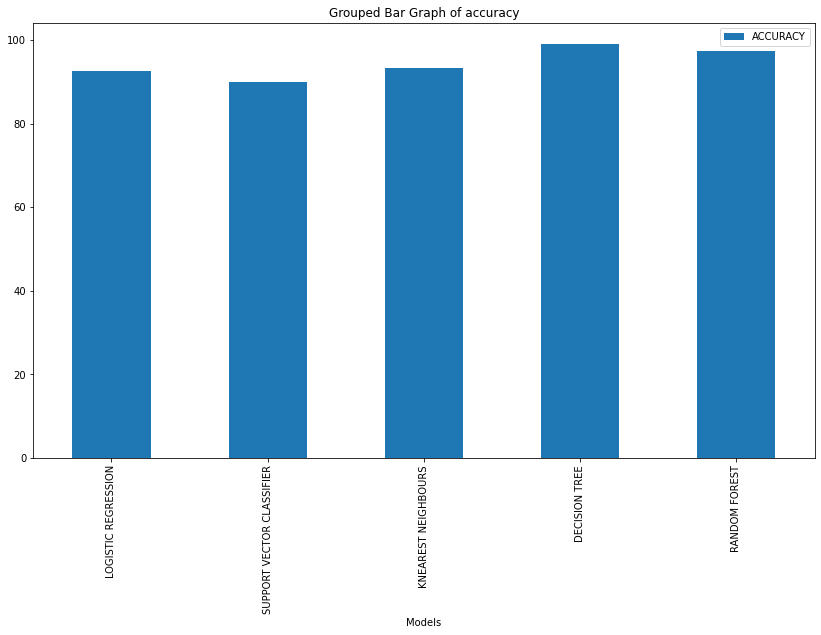

In [182]:
dfa =final_dataac  
dfa.plot(x='Models',
        kind='bar',
        stacked=False,
        title='Grouped Bar Graph of accuracy',
       figsize=(14,8))
